In [1]:
import yfinance as yf


In [2]:
# define dates 
start = '2015-12-28'
training_end = '2018-03-05'
treatment_start = '2018-03-12'
treatment_end = '2018-07-16'
end_stocks = '2018-07-17'

In [3]:
# get the stock data from yahoo finance
stocks = ['META','WMT','DIS','BMW.DE','NVS','GS','GE','KHC','MCD','CARL-B.CO']
data_set_stocks = yf.download(stocks, start=start, end=end_stocks, interval='1wk')
print(data_set_stocks)

[*********************100%%**********************]  10 of 10 completed
            Adj Close                                                  \
               BMW.DE   CARL-B.CO         DIS          GE          GS   
Date                                                                    
2015-12-28  64.783691  509.867371   98.814972  167.434555  153.509094   
2016-01-04  55.367729  494.467255   93.332558  152.921738  139.634293   
2016-01-11  51.771214  442.440033   88.301537  153.136795  132.539276   
2016-01-18  52.892635  449.931976   91.122673  151.792953  133.603973   
2016-01-25  50.868771  481.148407   90.107063  156.415573  137.607162   
...               ...         ...         ...         ...         ...   
2018-06-18  60.483112  658.965149  103.080231   76.066292  199.223114   
2018-06-25  58.464745  659.843140  101.597122   79.330429  194.419220   
2018-07-02  60.400257  684.424866  101.568039   80.729347  195.494553   
2018-07-09  59.963463  680.913147  107.485146   80.96

In [4]:
data_set_stocks=data_set_stocks.iloc[:,:10] 

In [5]:
# getting rid of unneeded levels
data_set_stocks.columns = data_set_stocks.columns.droplevel() 

In [6]:
# getting rid of na values
data_set_stocks = data_set_stocks.dropna(axis=0, how='any')

In [7]:
data_set_stocks.head()

,BMW.DE,CARL-B.CO,DIS,GE,GS,KHC,MCD,META,NVS,WMT
Date,,,,,,,,,,
2015-12-28,64.783691,509.867371,98.814972,167.434555,153.509094,52.110065,97.066414,104.660004,57.095680,52.198669
2016-01-04,55.367729,494.467255,93.332558,152.921738,139.634293,50.978485,94.880890,97.330002,54.122776,54.106098
2016-01-11,51.771214,442.440033,88.301537,153.136795,132.539276,49.560413,94.634399,94.970001,53.240192,52.735123
2016-01-18,52.892635,449.931976,91.122673,151.792953,133.603973,53.277439,97.280037,97.940002,54.574017,53.382294
2016-01-25,50.868771,481.148407,90.107063,156.415573,137.607162,55.905865,101.700363,112.209999,51.740479,56.507397


<AxesSubplot:xlabel='Date'>

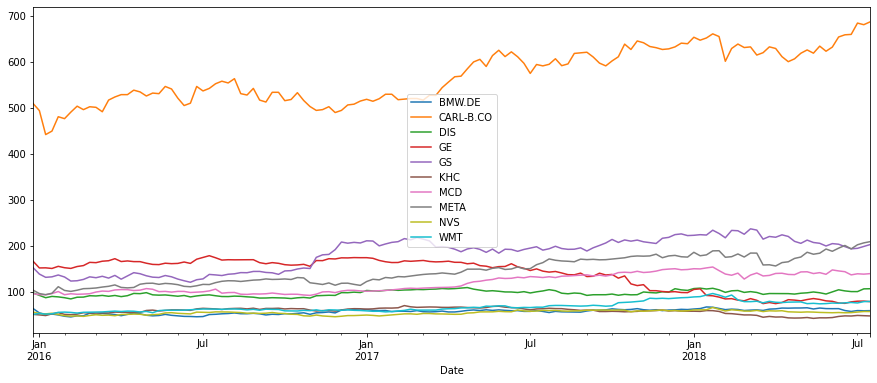

In [8]:
# plot the data
data_set_stocks.plot(figsize=(15, 6))    

In [9]:
# correlation during the training period to staisfy the parallel trends assumption


#Define the data set for the training period
data_set_corr = data_set_stocks[data_set_stocks.index <= treatment_start]

# calculate the correlation matrix to see if the parallel trends assumption is satisfied and the stocks are correlated
data_set_corr.corr()   


,BMW.DE,CARL-B.CO,DIS,GE,GS,KHC,MCD,META,NVS,WMT
BMW.DE,1.000000,0.677493,0.702099,-0.560315,0.900606,0.086082,0.733535,0.749997,0.541650,0.674949
CARL-B.CO,0.677493,1.000000,0.509493,-0.762227,0.661098,0.034456,0.931842,0.932952,0.867084,0.884714
DIS,0.702099,0.509493,1.000000,-0.318794,0.772599,0.336429,0.553775,0.546574,0.332149,0.471780
GE,-0.560315,-0.762227,-0.318794,1.000000,-0.603357,0.447606,-0.822315,-0.818774,-0.707410,-0.895724
GS,0.900606,0.661098,0.772599,-0.603357,1.000000,0.137826,0.751790,0.801839,0.492893,0.696490
KHC,0.086082,0.034456,0.336429,0.447606,0.137826,1.000000,-0.083728,0.026735,-0.035958,-0.128722
MCD,0.733535,0.931842,0.553775,-0.822315,0.751790,-0.083728,1.000000,0.946443,0.836783,0.896303
META,0.749997,0.932952,0.546574,-0.818774,0.801839,0.026735,0.946443,1.000000,0.828009,0.897989
NVS,0.541650,0.867084,0.332149,-0.707410,0.492893,-0.035958,0.836783,0.828009,1.000000,0.790410
WMT,0.674949,0.884714,0.471780,-0.895724,0.696490,-0.128722,0.896303,0.897989,0.790410,1.000000


In [10]:
# create the data set for the most correlated stocks
final_data_set = data_set_stocks[['META','WMT','BMW.DE','NVS','GS','MCD','CARL-B.CO']]

print(final_data_set)

                  META        WMT     BMW.DE        NVS          GS  \
Date                                                                  
2015-12-28  104.660004  52.198669  64.783691  57.095680  153.509094   
2016-01-04   97.330002  54.106098  55.367729  54.122776  139.634293   
2016-01-11   94.970001  52.735123  51.771214  53.240192  132.539276   
2016-01-18   97.940002  53.382294  52.892635  54.574017  133.603973   
2016-01-25  112.209999  56.507397  50.868771  51.740479  137.607162   
...                ...        ...        ...        ...         ...   
2018-06-18  201.740005  77.183060  60.483112  55.597866  199.223114   
2018-06-25  194.320007  77.938324  58.464745  55.953403  194.419220   
2018-07-02  203.229996  76.900963  60.400257  57.160763  195.494553   
2018-07-09  207.320007  79.803757  59.963463  58.353313  199.566864   
2018-07-16  209.990005  80.249649  60.257183  58.294052  203.630295   

                   MCD   CARL-B.CO  
Date                                
20

In [11]:
# create pre and pios treatment periods
pre_period = [start, training_end]
post_period = [treatment_start, treatment_end]  


In [15]:
# Causal Impact Analysis
#impact = CausalImpact(final_data_set, pre_period, post_period)

SyntaxError: invalid syntax (4130625594.py, line 2)